# Data prep for image recognition

The purpose of this short notebook is to introduce the most basic features of the OpenCV library, focusing on features that will make it possible to use intelligent APIs on image data.

In [1]:
import cv2
import numpy as np

The first thing we'll try is reading an image from a file.  OpenCV makes it easy to decode popular image formats, and this notebook has access to an image file we can read.

In [2]:
img = cv2.imread("otto.jpg", cv2.IMREAD_COLOR)

## Working with images as arrays

This will get us a `numpy` array containing the pixels from a picture of a confused schnauzer who did not expect to wind up unable to get out of the clothes basket. 

We can look at the size of the array:

In [3]:
img.shape

(267, 215, 3)

We can examine the image itself by plotting it.

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

While our focus is on using pretrained models, if you're training a model, it may be useful to transform, blur, or resize images in order to generate more training data from a few images.  Since our images are `numpy` arrays, this is relatively straightforward in general, but OpenCV provides functions to make these tasks even easier.  We'll see how to

- blur an input image with a 15x15 box blur,
- resize an image and interpolate between pixels in the source data, and
- rotate an image without calculating a transformation matrix

First, let's look at box blur:

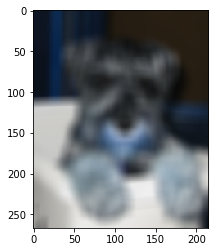

In [5]:
plt.imshow(cv2.blur(img, (15,15)))

We can also scale the image by a factor of 3 on both axes (notice the difference in the axes on the plotted image, even though the size doesn't change).

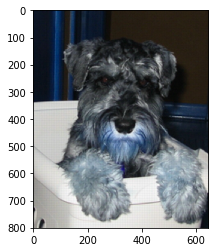

In [6]:
plt.imshow(cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC))

It's also possible to stretch the image by scaling along axes differently:

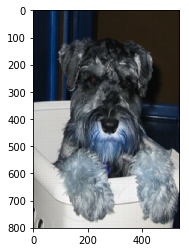

In [7]:
plt.imshow(cv2.resize(img, None, fx=2.5, fy=3, interpolation=cv2.INTER_CUBIC))

We can also rotate the image.  Recall that rotation is an affine tranformation on image matrices.  OpenCV provides a function to calculate the transformation matrix, given a point to rotate around, an angle of rotation, and a scaling factor.  Here we'll rotate the image around its center by 15 degrees while scaling by 1.3x.

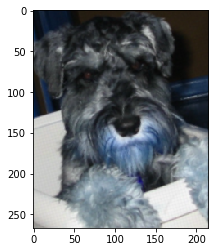

In [8]:
rows, cols, _ = img.shape
center = (cols / 2, rows / 2)
angle = 15 # degrees
scale = 1.3
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
plt.imshow(cv2.warpAffine(img, rotationMatrix, (cols, rows)))

## Working with image data in byte arrays

In many non-batch applications, we won't be actually processing _files_; instead, we'll be dealing with binary data, whether passed as a base64-encoded string to a HTTP request or stored in a blob as part of structured data on a stream.  OpenCV is able to decode this raw binary data just as it is able to decode files; this last part of the notebook will show you how to do it.

We'll start by getting a Python `bytearray` with the contents of a file.  Notice that, while we have a JPEG file, we aren't storing the file type anywhere.

In [9]:
with open("otto.jpg", "rb") as f:
    img_bytes = bytearray(f.read())

Now that we have a `bytearray` of the file's contents, we'll convert that into a flat NumPy array:

In [10]:
imgarr = np.asarray(img_bytes, dtype=np.uint8)
imgarr

array([255, 216, 255, ..., 143, 255, 217], dtype=uint8)

The OpenCV `imdecode` function will inspect this flat array and parse it as an image, inferring the right type and dimensions and returning a multidimensional array with an appropriate shape.

In [11]:
img2 = cv2.imdecode(imgarr, cv2.IMREAD_COLOR)

We then have a multidimensional array that we can use just as we did the image we read from a file.

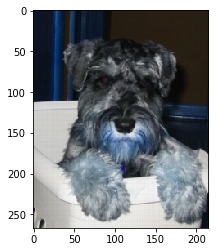

In [12]:
plt.imshow(img2)

## Image intensities

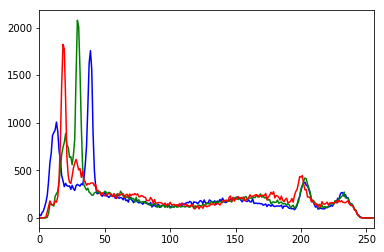

In [15]:
for i, color in enumerate(["b", "g", "r"]):
    histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.show()

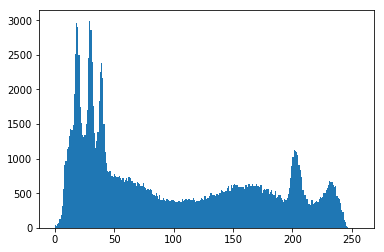

In [17]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

## Basic feature detection